# Predicting Wine Quality with Stochastic Gradient Descent

Alex Angus and Michael Robertson

<img src='https://img.mshanken.com/d/wso/bolt/Featured/Ratings/dailywinepicks_1600.jpg?w=800&q=90' align='left'>

**In this project we demonstrate and analyze a regression model for predicting the quality of wines. Specifically, we will be using gradient descent to forecast the quality rating that a human critic would give a wine.**

Gradient descent is an optimization method that is specifically designed for large datasets. For a larger dataset, we might consdier using stochastic gradient descent, which differs from normal gradient descent in that it uses a stochastic (random) approximation of the gradient from a subset of the data to optimize a loss function, rather than using the gradient calculated from the entire dataset. This approximation takes advantage of parallelizability of modern machines, thus making it more suitable to larger datasets.  

Our process of developing a predictive model from various relevant wine features (characteristics) is outlined below:

# Theory

We will begin developing our model as a **Linear Regression using Least Squares**. The simplest equation for a line with y-intercept = 0 can be expressed as

$$\hat{y} = \theta x \tag{1}$$

where $\hat{y}$ is the variable that represents our predicted value, $x$ represents feature values, and $\theta$ represents that feature's *weight*, or how important that feature is in making an accurate prediction. This equation can be modified to include multiple features by adding additional $\theta x$ terms

$$\hat{y} = \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \dots + \theta_N x_N \tag{2}$$

where $N$ is the total number of features. For our model to be able to 'imitate' a given dataset, we need to define some kind of function that tells us how well it is doing. This function that represents how close a prediction from our model is to actual data is called the loss function. For a linear regression, we choose to define our loss function as a **summation of least squares.** Our loss function is

$$J(\theta) = \sum_{i = 1}^{n}(\hat{y}_i - y_i)^2 \tag{3}$$

where $J$ is the value of our loss function, $i$ is the index of a data point, and $y$ is that data point's value. We choose to use a summation of least squares as our loss function because it is always a *convex* function, and it has the shape of a parabola.

<img src='https://quantdare.com/wp-content/uploads/2018/11/convex_funct.png' align='middle'>

This is important because we are trying to minimize our loss function, and a convex function always has only one global minimum. With summation of least squares, we do not need to worry about our algorithm 'getting stuck' on local minima or maxima, or a global maximum.

We can rewrite our loss function in a more useful form

$$J(\theta) = \sum_{i = 1}^{n}\left( \sum_{j = 1}^{N}\theta_j x_{i, j} - y_i \right)^2 \tag{4}$$

where $j$ is the index of each feature/weight.

We find the minimum of our loss function by searching for the point where the function's slope is zero. To do this, we must take the derivitive of the loss function with respect to each weight $\theta_j$. The derivitive of the loss function is called the optimization function, and it can be expressed component-wise through partial derivates of the form

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{2}{n}\sum_{i = 1}^{n}(\hat{y_{i, \theta}} - y_i) x_i = 0 \tag{5}$$

where $\theta = (\theta_1, \theta_2, \dots, \theta_N)$, and $\theta_j$ is a component of $\theta$. We then want to find the values of $\theta$ that make $J(\theta)$ as close to zero as possible, which is a means we need to find the root (zero) of $J(\theta)$. To find the root, we must use a numerical root solving method. We choose to implement a Newton like method that recursively produces better approximations of a function's root via the expression

$$ \theta_{t + 1} = \theta_{t} - \alpha \nabla J(\theta_t)\tag{6}$$

where $\theta_t$ is a vector representation of our weights. We use $\frac{1}{\alpha}$ as a constant approximation for $\nabla^2 J(\theta)$, which Newton's method would use. 

We call $\alpha$ a **hyperparameter** of our algorithm. Hyperparameters are values used by the algorithm other than the data given. They affect the quality of the model, so for the same data, we could expect different predictions from gradient descent if we used different hyperparameters. 

The hyperparameter $\alpha$ is often referred to as the *step size* or *learning rate* as it determines how fast our algorithm converges to a given root. Too large a value of $\alpha$ will cause our model to jump over a valley in our objective function, and too small a value will unecessarily prolong training. 


We iteratively update our theta vector using this expression until our gradient becomes satisfactorily small. What we consider "satisfactory" is another hyperparameter called **tolerance**, and we can generally expect a more accurate, but slower-in-training model for a smaller tolerance. When the size (via the vector 2-norm) of our gradient has decreased below our tolerance, as described by (7),

$$||\nabla J(\theta)||_2 < tolerance \tag{7}$$,

we accept the theta vector as our best approximation to the roots of our optimization function, and we use them to make predictions. 

Later, we may wish to add higher order terms to our model. To do this without changing the math outlined above, we can simply add higher order terms by including new features in our dataset that correspond to original features raised to various powers. 

# Implementation

We import moduals here that are useful for implementing gradient descent/visualization. The module **wine_regression_functions.py** is a user defined module.

In [1]:
"""
Import modules.
"""
import numpy as np
import scipy
import matplotlib.pyplot as plt
from data.source.wine_regression_functions import read_wine_csv, initial_weights, \
normalize_data, descent, train_validate_test, MSE, model, normal_eqs, hyper_parameter_search, bias
from data.source.wine_regression_functions import shuffle
import time

We then assign the paths of our datasets of red and white wine to variables, and format them by feature with the function **read_wine_csv()**.

In [2]:
"""
Import csv data files and format them by feature.
"""
red_wine = './data/winequality-red.csv'
white_wine = './data/winequality-white.csv'

red_data = read_wine_csv(red_wine)
white_data = read_wine_csv(white_wine)

Plots of each wine feature that we are considering and the wine's quality rating can be seen below. 

Note: it is not vital that we remove features with little to no contributions to the final model, as their weights should come out as insignificantly small.

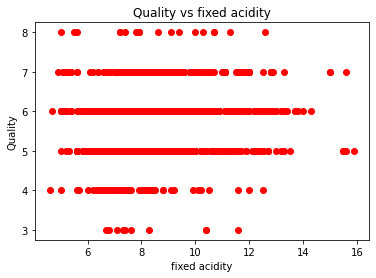

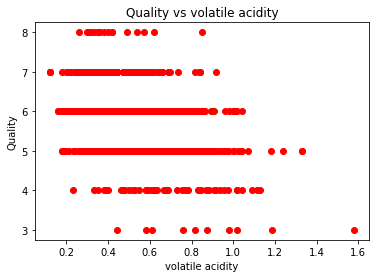

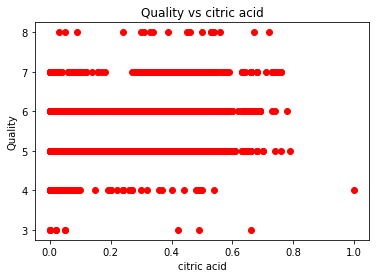

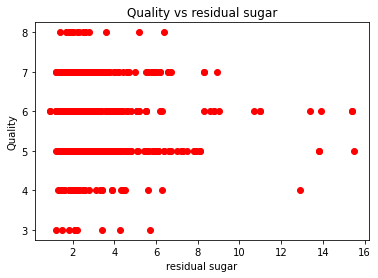

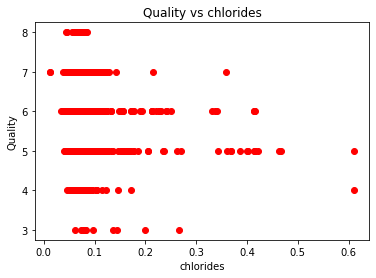

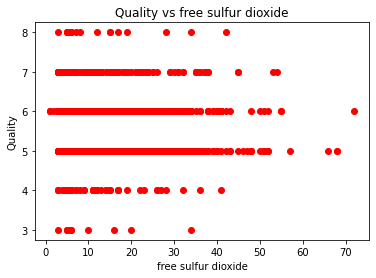

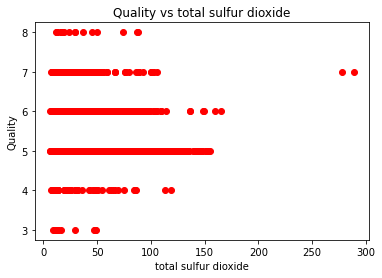

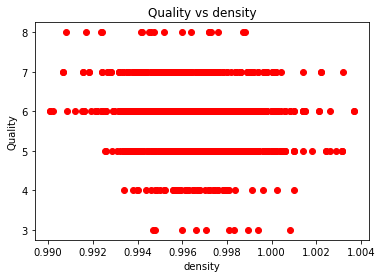

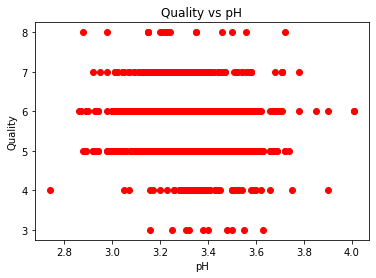

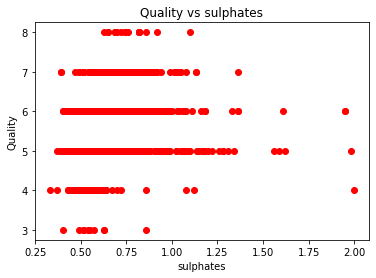

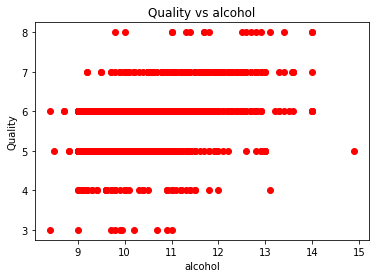

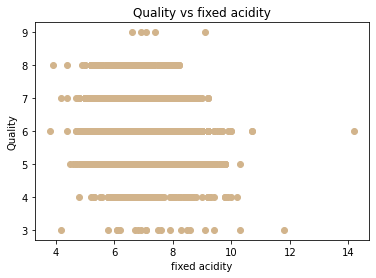

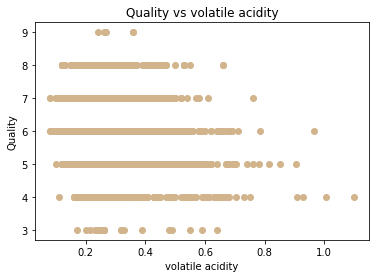

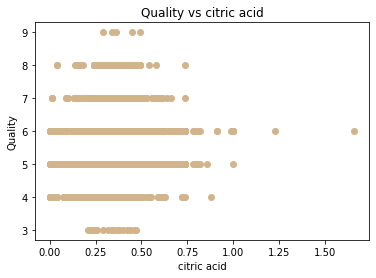

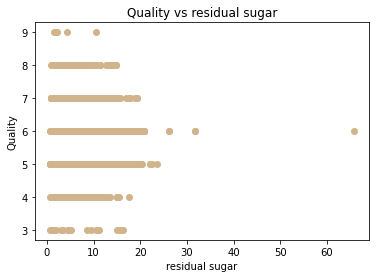

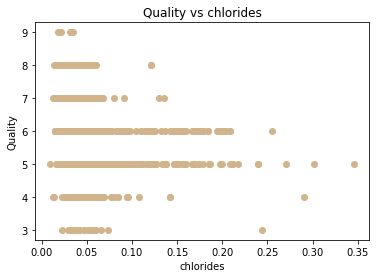

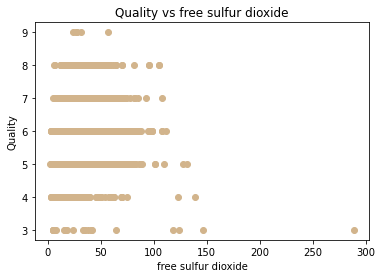

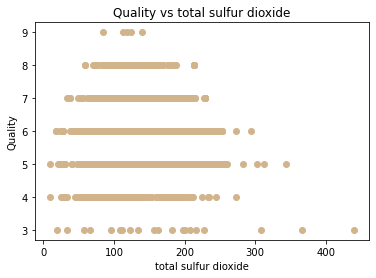

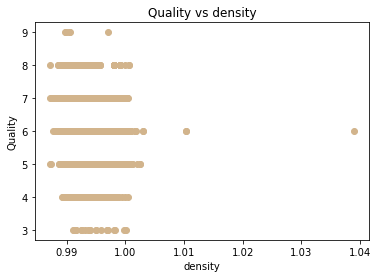

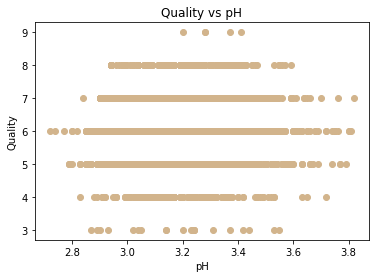

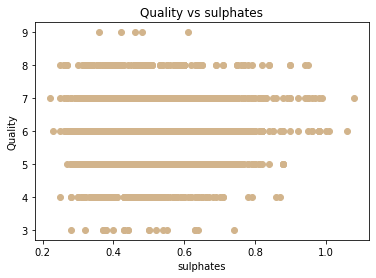

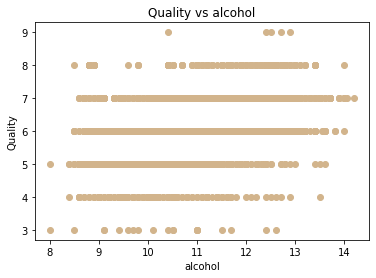

In [3]:
"""
Plot Quality vs. each feature.
"""
for feature in red_data.keys():
    if feature == 'quality':
        continue
    plt.scatter(red_data[feature], red_data['quality'], color='red')
    plt.title('Quality' + ' vs ' + feature)
    plt.ylabel('Quality')
    plt.xlabel(feature)
    plt.show()
    
for feature in white_data.keys():
    if feature == 'quality':
        continue
    plt.scatter(white_data[feature], white_data['quality'], color='tan')
    plt.title('Quality' + ' vs ' + feature)
    plt.ylabel('Quality')
    plt.xlabel(feature)
    plt.show()

The correlation between features and quality is quite clear.

Just kidding! It's really difficult to tell if there is any correlation between any one of these variables and the quality of the wine, which is why we need a more sophisicated method to predict the quality, such as gradient descent. But, before we start implementing, we need to first make sure that our data is formatted in a manner such that the information we get from feature to feature makes sense. As an example, it does not make sense to look at the acidity measured in pH compared to the density measured in grams per ml. We must standardize our data by **normalization** to put it into context. To do this we subtract the mean and divide by the standard deviation of each feature. 

$$x_{normalized} = \frac{x_{unnormalized} - \mu_{feature}}{std_{feature}} \tag{8}$$

After this, each feature has a mean of zero and a standard deviation of one, which makes them much more meaningful. Our implementation of this calculation is performed behind the scenes in the user defined module, but you can see the function call of **normalize_data()** below.

In [4]:
"""
Normalize data.
"""
normalized_red_data = normalize_data(red_data)
normalized_white_data = normalize_data(white_data)

It is also a good idea to shuffle our data to eliminate any ordering biases in the original dataset. We do that with the function **shuffle()** in the user defined module. 

<img src='https://www.wikihow.com/images/d/d4/Riffle-and-Bridge-Shuffle-Step-8-Version-4.jpg' >

In [5]:
"""
Shuffle data to avoid ordering bias.
"""
shuffled_normalized_red_data = shuffle(normalized_red_data)
shuffled_normalized_white_data = shuffle(normalized_white_data)

Now that our data is normalized and shuffled, we can split it into three separate datasets: train, validate, and test.

**Train:**

The training dataset is the data that our model learns from. Our weights are trained from this set, and so it must be the biggest dataset. For this implementation we decided to randomly select 80% of our dataset as the training set.

**Validate:**

We use the validation set to intermittentally evaluate how our model is training. Specifically, the validation dataset is used to fine tune hyperparameters. We took 15% of our original dataset as the validation set. 

**Test:**

The test set is used as the final evaluation of the model. The model never sees this set, and a model's performance on the test set is often used as a metric for choosing between competing models. In this instance, our test set is 5% of the original dataset.

<img src='https://miro.medium.com/max/776/1*Nv2NNALuokZEcV6hYEHdGA.png'>

Here is our split between training, validation, and testing:

In [6]:
"""
Split original dataset into train, validate, and test sets.
"""
red_train, red_validate, red_test = train_validate_test(normalized_red_data)
white_train, white_validate, white_test = train_validate_test(normalized_white_data)

It is at this point which we are ready to train our model with gradient descent. Our gradient descent implementation in the function **descent_example()**, and our model function **model_example()** can be seen below.

In [7]:
def model_example(theta, feature_values):
    """
    our model function of the form:

        y_hat = theta1 * x1 + theta2 * x2 + theta3 * x3 + ...

    where xn is an array of feature values and each theta represents that
    feature's contribution to the wine quality.
    """
    model_value = 0
    for i in range(len(feature_values)):
        model_value += theta[i] * feature_values[i]
    return model_value

def descent_example(feature_dictionary, tolerance, alpha):
    """
    Performs gradient descent.
    
    inputs:
        feature_dictionary is a dictionary containing feature values
    
        tolerance is our stopping tolerance (difference between successive theta updates)
    
        alpha is the learning rate
    
    output:
        theta is an array of trained weights
    """
    starttime = time.time()
    feature_length = len(feature_dictionary.keys()) - 1 #minus 1 because quality isn't a feature

    quality_data = feature_dictionary['quality']


    #feature dictionary --> feature array for defined iterations
    feature_data_array = np.empty(feature_length, dtype=np.ndarray)
    feature_iterator = 0
    for feature in feature_dictionary.keys():
        if feature == 'quality':
            continue
        feature_data_array[feature_iterator] = feature_dictionary[feature]
        feature_iterator += 1


    theta_prediction = initial_weights(feature_length) #initial weights
    theta = np.copy(theta_prediction)
    count = 0
    error = 1.0
    while abs(error) > tolerance:
        y_hat = model_example(theta, feature_data_array)
        for feature in range(feature_length):
            """
            This is where we calculate the value of our loss function:
                sum( (y_hat - y)x ) = 0
            """
            sum_value = np.sum((y_hat - quality_data) * feature_data_array[feature])
            #then update weights
            theta[feature] = theta_prediction[feature] - alpha * sum_value

        error = sum(theta - theta_prediction)
        theta_prediction = np.copy(theta)
        count += 1
        if count%8000 == 0:
            print("error: ", error)
    return theta #return the fitted linear weights

alpha = 0.0000002 
tolerance = 0.00001

trained_red_theta = descent_example(red_train, tolerance, alpha)
trained_white_theta = descent_example(white_train, tolerance, alpha)

print("Trained weights of the red wine model: ", trained_red_theta)
print("Trained weights of the white wine model: ", trained_white_theta)

error:  -0.00016698482656780228
error:  -4.4453100869503576e-05
error:  -1.697662848010144e-05
error:  -1.8249681391663275e-05
Trained weights of the red wine model:  [ 0.24208745 -0.25222414 -0.08050819 -0.06209606 -0.01895972  0.06784506
  0.0154442  -0.26335227  0.1426734   0.17796783  0.14696225]
Trained weights of the white wine model:  [-0.02548229 -0.19072275  0.03610636  0.24340061  0.05602191  0.13611741
 -0.1232559  -0.08009759  0.07709177 -0.05464763  0.45674311]


# Verification

To verify our results, we will use an 'off the shelf' implementation of gradient descent, and compare our results. We choose to use the sklearn module.

In [10]:
import sklearn.linear_model as skl

def test_with_sklearn(feature_dictionary):
    """
    Performs (stochastic) gradient descent with the sklearn package.
    """
    feature_data_array = []
    for feature in feature_dictionary.keys():
        if feature == 'quality':
            continue
        feature_data_array.append(list(feature_dictionary[feature]))
    quality_array = feature_dictionary['quality']  
    linear_model = skl.SGDRegressor(tol=tolerance, alpha=alpha)
    reshaped_feature_array = np.rot90(np.array(feature_data_array))
    fit = linear_model.fit(reshaped_feature_array, quality_array, coef_init=initial_weights(len(feature_data_array)))
    return linear_model.coef_

trained_sklearn_theta_red = test_with_sklearn(red_train)
trained_sklearn_theta_white = test_with_sklearn(white_train)

print("Sklearn trained weights of red wine model: ", trained_sklearn_theta_red)
print("\nSklearn trained weights of white wine model: ", trained_sklearn_theta_white)

Sklearn trained weights of red wine model:  [-0.04475513  0.0303142   0.08372385 -0.01138628 -0.02392691 -0.01031074
  0.00329942 -0.00973991  0.00510983 -0.0801718  -0.0240032 ]

Sklearn trained weights of white wine model:  [-0.03605111  0.00609722  0.02438883 -0.07201993 -0.00380293  0.01048249
 -0.00560326  0.08333169 -0.01584099  0.01155508  0.00511781]


To compare our model and sklearn's model, we compare their respective **mean squared errors** for the validation dataset with the user defined function **MSE()**.

In [11]:
"""
Calculate difference between MSEs of our model and sklearn's model.
"""
our_red_MSE = MSE(trained_red_theta, red_validate)
sklearn_red_MSE = MSE(trained_sklearn_theta_red, red_validate)
print("Red difference:", round(abs(our_red_MSE - sklearn_red_MSE), 6))

our_white_MSE = MSE(trained_white_theta, white_validate)
sklearn_white_MSE = MSE(trained_sklearn_theta_white, white_validate)
print("White difference:", round(abs(our_white_MSE - sklearn_white_MSE), 6))

Red difference: 0.000242
White difference: 0.0006


These differences are on the order of $10^{-4}$, which is quite small. We expect the sklearn model to be slightly more accurate, only because it implements a more robust gradient descent algorithm. It is clear, however, that our model is verified.

# Regularization

To further improve our model, we include a **regularization term**. This term serves as a preventative measure for *overfitting*. We want our model to generalize well to new data, and if it pays too much attention to the intricacies of our training set, then it will be looking for those details in a new dataset, where they may not exist. For simplicity, we choose to use **ridge regression** to avoid overfitting. Our loss function $(2)$ becomes

$$J(\theta) = \frac{1}{2n} \sum_{i = 1}^{n}(\hat{y_i} - y_i)^2 + \lambda \sum_{j = 1}^{N} \theta_j^2 \tag{9}$$

where $N$ is the number of theta components and $\lambda$ is an additional hyperparameter called the *regularization coefficient*.

We perform gradient descent again, this time with our new regularization term:

In [12]:
"""
Perform gradient descent with ridge regression.
"""
tolerance = 0.00001
alpha = 0.0000002 
lambda_ = 0.00001

ridge_trained_theta_red = descent(red_train, tolerance, alpha, model_type='ridge', regularization=lambda_)
ridge_trained_theta_white = descent(white_train, tolerance, alpha, model_type='ridge', regularization=lambda_)

print("Red wine trained weights with ridge regression: ", ridge_trained_theta_red)
print("White wine trained weights with ridge regression: ", ridge_trained_theta_white)

Red wine trained weights with ridge regression:  [ 0.10040221 -0.22710623 -0.03777528 -0.09328656 -0.05392502  0.07901938
 -0.00520082 -0.16045645  0.06892036  0.18081567  0.19625   ]
White wine trained weights with ridge regression:  [-5.96423762e-02 -2.24107357e-01  2.67810539e-02  2.00211403e-01
  6.25193636e-02  7.07705043e-02 -3.98225002e-02 -2.97144434e-04
  4.82710878e-02 -6.65608968e-02  5.35866476e-01]


To quantify how 'overfit' a model is, we look at a parameter called bias. Bias is defined as how well a model fits a specific dataset, and is expressed as

$$B = \frac{1}{n} \sum_{i = 1}^n \left( \hat{y}_i - y_i \right) \tag{10}$$

where $B$ is for bias and $n$ is the number of values for each feature. Below, we calculate the bias of the linear model and the ridge regression model on our training set with the function **bias()** from the user defined module.

In [13]:
"""
Calculate bias and bias difference of ridge model and linear model.
"""
red_linear_bias = bias(trained_red_theta, red_train, model_type = 'linear', regularization = None)
red_ridge_bias = bias(ridge_trained_theta_red, red_train, model_type = 'ridge', regularization = lambda_)

white_linear_bias = bias(trained_white_theta, white_train, model_type = 'linear', regularization = None)
white_ridge_bias = bias(ridge_trained_theta_white, white_train, model_type = 'ridge', regularization = lambda_)

print("Red linear model bias: \t", red_linear_bias)
print("Red ridge model bias: \t", red_ridge_bias)
print("White linear model bias: \t", white_linear_bias)
print("White ridge model bias: \t", white_ridge_bias, "\n")
print("Red difference: ", round(abs(red_linear_bias - red_ridge_bias), 6))
print("White difference: ", round(abs(white_linear_bias - white_ridge_bias), 6))

Red linear model bias: 	 -5.615211652464715
Red ridge model bias: 	 -5.615112840896096
White linear model bias: 	 -5.8832420958599565
White ridge model bias: 	 -5.8829768649761505 

Red difference:  9.9e-05
White difference:  0.000265


It's clear that the inclusion of a regularization term, in this application, is not worth the extra computational time. We see no significant benefit of performing ridge regression. Our model does not appear to be overfit to the training set, thus we proceed without the regularization term.

# Higher Order Terms

A different improvement we could make with our model is the inclusion of higher order terms. As it's not immediately clear which higher order terms, or features, we should add to our model, we perform a hyperparameter search with the function **hyper_parameter_search()**. This function implements gradient descend for different added squared features, and compares the resulting higher order model with our linear model. It then returns the higher order model with the least mean squared error on the validation set. 

The results of our hyperparameter search showed that there was no significant improvement when adding higher order terms in the manner that we did, and thus we believe it is not beneficial to the understanding of how our model works to include it here. 

# Testing

It is now time to use our model with the test set, to determine it's final performance. To do this, we examine the mean square error of our predictions, compared to the real human predictions in the test set.

In [14]:
"""
Examining the mean squared error of our model on the test set.
"""
MSE_test_red = MSE(trained_red_theta, red_test)
MSE_test_white = MSE(trained_white_theta, white_test)
print("MSE of red model: ", MSE_test_red)
print("MSE of white model: ", MSE_test_white)

MSE of red model:  0.6383173259708285
MSE of white model:  0.3793879790817316


We see that our white wine predictive model performs slightly better than our red model. This makes sense since we have more than twice as much data for white wines. It is then reasonable to conclude that our model performs in a satisfactory manner, and does a decent job predicting the quality that a human taster may give a wine.